In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = "MNIST"

loss_value = 0.1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()
data_modifications = ['data_0']

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 1000
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'mo

In [2]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

In [3]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss, all_test_acc = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    print(all_log_rn)
    print(all_test_acc)


Processing data modification folder: data_0
[[769947.9927609862], [789254.9016694814], [787009.6623882133], [817512.9495358836], [801223.2802685995], [778891.6883953549], [777496.9892526914], [787658.5382411716], [779286.0022778701], [800531.6258605293], [790867.6104958281], [785336.4492253222], [796932.5985430777], [794834.2613122676], [796835.4574073224], [781257.879380539], [797165.2365511539], [783218.3088127008], [804042.579339614], [804944.5300068308], [775964.60360577], [765246.3925322803], [798133.2648395279], [787658.5382411716], [787124.3837252453], [800407.3290704179], [773065.656307334], [799176.469022913], [777923.00507353], [803067.1143399375], [787339.4372365521], [806596.5992140609], [786730.0698427301], [794439.9474297524], [806167.1470394871], [779343.3937958583], [785336.4492253222], [810076.0564626498], [788966.9596227895], [808220.8587906111], [808677.025789309], [796742.1422250096], [787643.8475436195], [796645.366920721], [783221.5231519167], [795481.5950533686]

In [4]:
all_log_rn_list = [val for sublist in all_log_rn for val in sublist]
all_test_acc_list = [val for sublist in all_test_acc for val in sublist]

print(all_log_rn_list)
print(all_test_acc_list)

[769947.9927609862, 789254.9016694814, 787009.6623882133, 817512.9495358836, 801223.2802685995, 778891.6883953549, 777496.9892526914, 787658.5382411716, 779286.0022778701, 800531.6258605293, 790867.6104958281, 785336.4492253222, 796932.5985430777, 794834.2613122676, 796835.4574073224, 781257.879380539, 797165.2365511539, 783218.3088127008, 804042.579339614, 804944.5300068308, 775964.60360577, 765246.3925322803, 798133.2648395279, 787658.5382411716, 787124.3837252453, 800407.3290704179, 773065.656307334, 799176.469022913, 777923.00507353, 803067.1143399375, 787339.4372365521, 806596.5992140609, 786730.0698427301, 794439.9474297524, 806167.1470394871, 779343.3937958583, 785336.4492253222, 810076.0564626498, 788966.9596227895, 808220.8587906111, 808677.025789309, 796742.1422250096, 787643.8475436195, 796645.366920721, 783221.5231519167, 795481.5950533686, 771594.3584077305, 804512.2497770367, 783545.4127781382, 797389.4759661106]
[0.8892000079154968, 0.886300003528595, 0.8874000012874603,

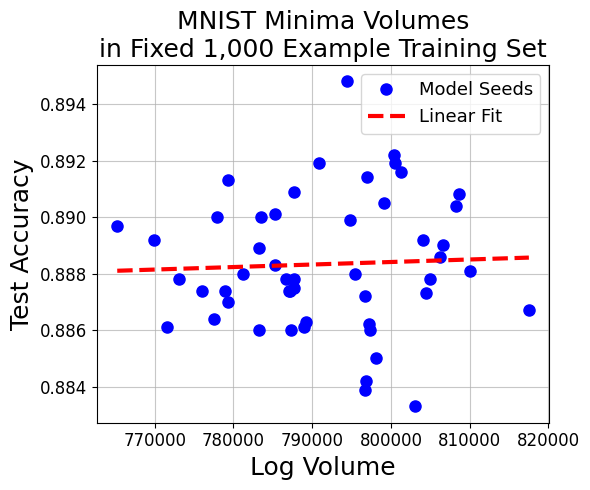

In [5]:
from minima_volume.volume_funcs import plot_pair_metrics


plot_pair_metrics(
    # metric1_values=all_test_loss_list,
    metric1_values=all_log_rn_list,
    metric2_values=all_test_acc_list,
    # metric2_values=all_log_rn_list,
    # xlabel="Test Loss",
    xlabel="Log Volume",
    ylabel="Test Accuracy",
    # ylabel="Log Volume",
    title="MNIST Minima Volumes\nin Fixed 1,000 Example Training Set",
    display=True,
    connect_dots=False,
    label='Model Seeds',
    show_best_fit=True,
    xlabel_size=18, ylabel_size=18, title_size=18, legend_size = 13,
    alpha=0.7
)